# How to inject artifical signals into K2 light curves

`lightkurve` will include classes to inject artificial signals (e.g. supernovae, planetary transits, rotation, flares) into K2, Kepler, TESS, and potentially ground based light curves. 

Let's download a K2 light curve of a galaxy. Currently, injection works on the light curve level, so we'll need to construct a light curve from the target pixel file.

In [56]:
from lightkurve import KeplerTargetPixelFile
import lightkurve.injection as inj
import matplotlib.pyplot as plt
import numpy as np

tpf = KeplerTargetPixelFile.from_archive(220381074)   #KeplerTargetPixelFile
lc = tpf.to_lightcurve(aperture_mask='all')           #KeplerLightCurve

#Remove nans and outliers
lc = lc.remove_nans().remove_outliers()              

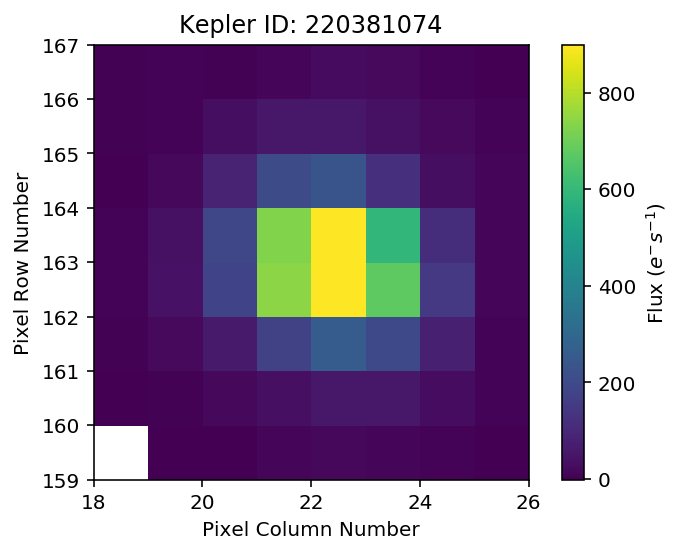

In [57]:
tpf.plot()

(0, 1.5)

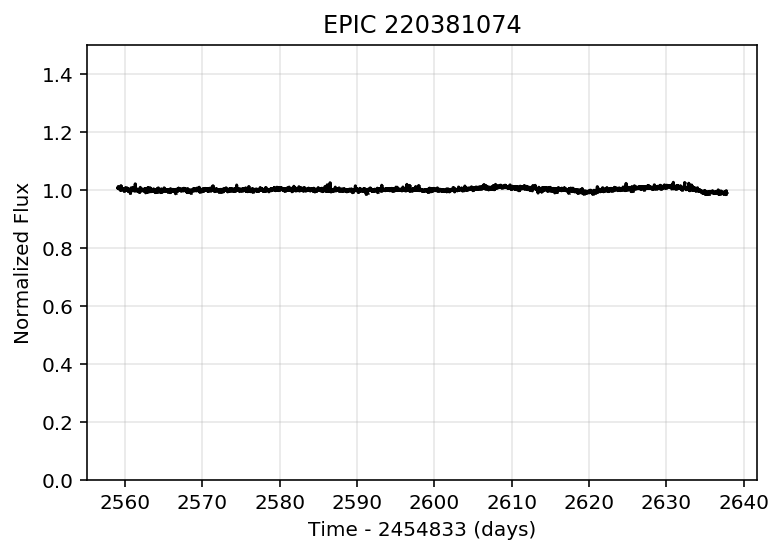

In [58]:
lc.plot();
plt.title('EPIC 220381074')
plt.ylim(0, 1.5)

This light curve of this galaxy is fairly smooth, but there may be some variability from the spacecraft motion and thermal fluctuations.
Now let's create a supernova model with the new `SupernovaModel` class. You'll need to install [sncosmo](http://sncosmo.readthedocs.io/) for this class to work.

We can specify the source, bandpass, and redshift of the supernova model. These attributes are common to every source.

In [59]:
model = inj.SupernovaModel(source='hsiao', bandpass='kepler', z=0.5)

Now we can construct the light curve by using the `.evaluate` method.  We can specify the time array for the supernova model, $t_0$, and parameters specific to the source - in this case, amplitude.

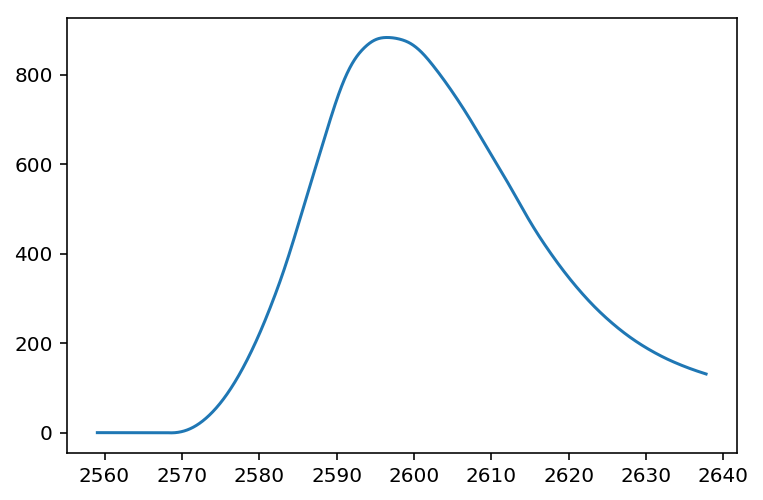

In [60]:
flux = model.evaluate(lc.time, t0=np.nanmedian(lc.time), amplitude=3.e-4)
plt.plot(lc.time, flux)

Finally, we can inject the supernova model into our K2 light curve using the `.inejct` method. (We don't actually need to realize the model to do this.) Let's plot the K2 light curve and the injected light curve next to it.

(0.8, 1.2)

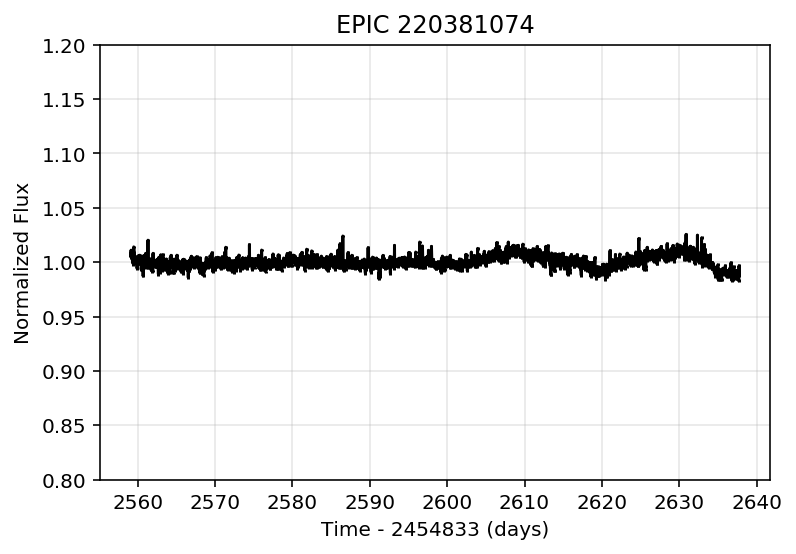

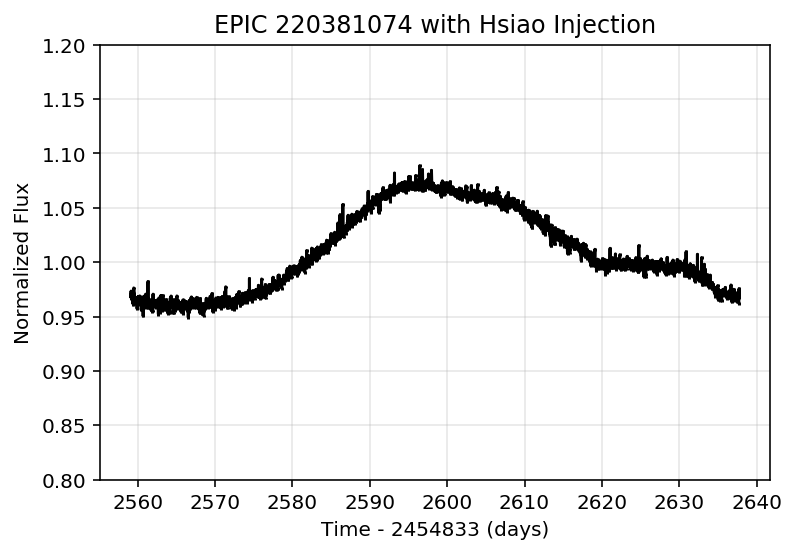

In [61]:
lcinj = inj.inject(lc, model, t0=np.nanmedian(lc.time), amplitude=3.e-4)

#K2 light curve
lc.plot()
plt.title('EPIC 220381074')
plt.ylim(0.8,1.2)

#K2 light curve with injection
lcinj.plot()
plt.title('EPIC 220381074 with Hsiao Injection')
plt.ylim(0.8,1.2)

We injected a supernova light curve into this galaxy!

This supernova is based on the [Hsiao](http://adsabs.harvard.edu/abs/2007ApJ...663.1187H) source 
and takes three parameters: redshift $z$, amplitude, and $t_0$ (time of zero phase). 
<br>
(Note: depending on the source, $t_0$ may specify the beginning or the peak of the supernova.)
<br>

You can specify the source and input the parameters belonging to this source accordingly. Paramters can also be chosen randomly from a uniform distribution using `UniformDistribution.sample`, or a Gaussian distribution using `GaussianDistribution.sample`. For example, let's simulate a supernova with the SALT2 model, which takes 5 parameters ($t_0$, $z$, $x_0$, $x_1$, and $c$), and choose $z$ randomly from a Gaussian distribution with mean 0.5 and sigma 0.2:

(0.8, 1.2)

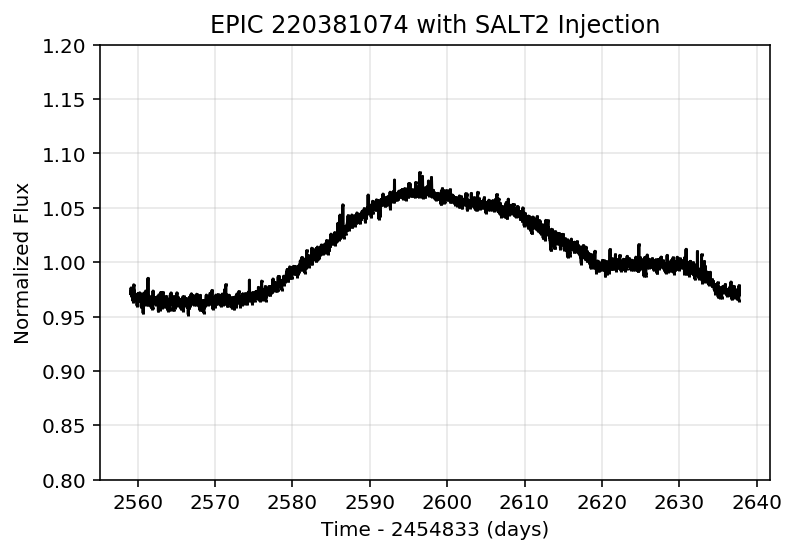

In [63]:
modelSALT2 = inj.SupernovaModel(source='salt2', bandpass='kepler', z=inj.GaussianDistribution(0.5, 0.2).sample())
lcinjSALT2 = inj.inject(lc, modelSALT2, t0=np.nanmedian(lc.time), x0=5, x1=1.e-6, c=0.1)

lcinjSALT2.plot()
plt.title('EPIC 220381074 with SALT2 Injection')
plt.ylim(0.8,1.2)

We can also use the .inject method to inject a planetary transit. Let's download the Kepler light curve of a G-type star:

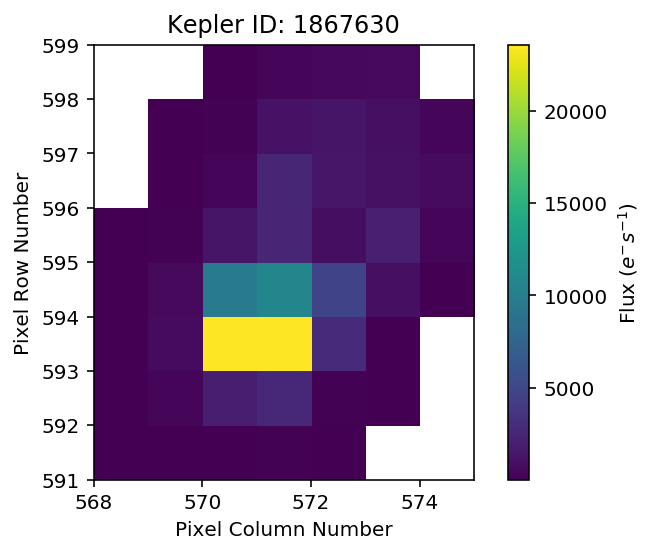

In [64]:
tpf = KeplerTargetPixelFile.from_archive(1867630, quarter=1)
lc = tpf.to_lightcurve(aperture_mask='all')

#Remove nans and outliers
lc = lc.remove_nans().remove_outliers()

tpf.plot()

(0, 1.2)

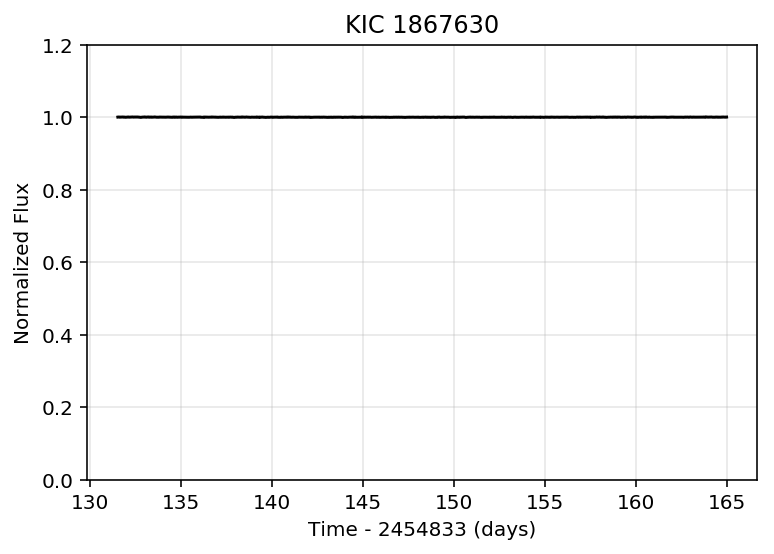

In [65]:
lc.plot();
plt.title('KIC 1867630')
plt.ylim(0, 1.2)

The Kepler light curve of this star is very smooth, but if we zoom in we can see that there is some slight variability: 

(0.995, 1.005)

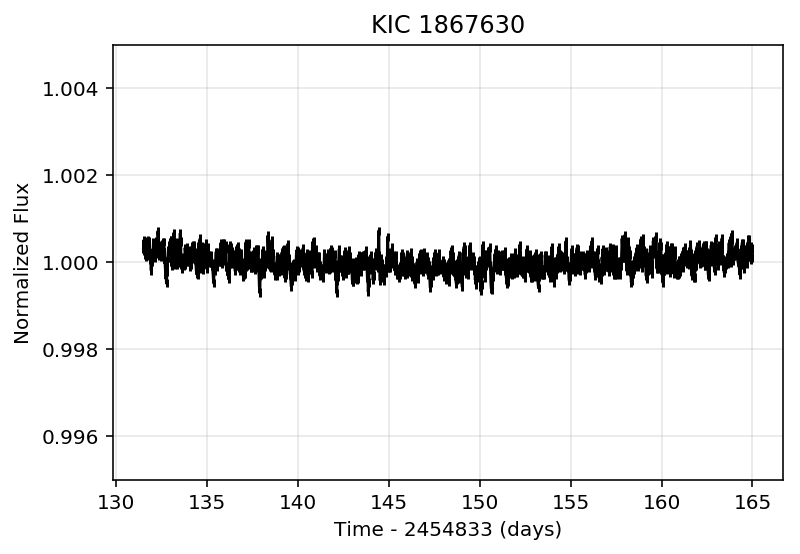

In [66]:
lc.plot();
plt.title('KIC 1867630')
plt.ylim(0.995, 1.005)

Now let's inject a planetary transit into this light curve. We're going to inject a jupiter-sized planet with an orbital period of 5 days using `TransitModel`.

(0.985, 1.01)

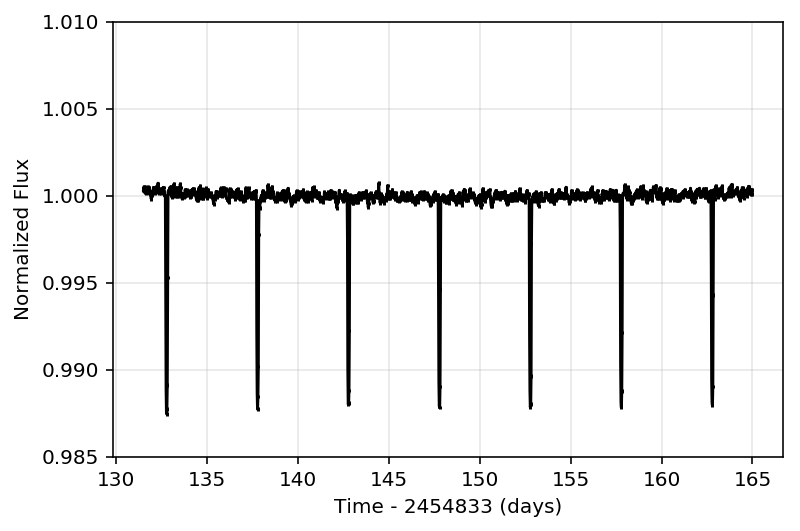

In [68]:
model_transit = inj.TransitModel(period=5, rprs=0.1)
lc_transit = inj.inject(lc, model_transit)
lc_transit.plot()
plt.ylim(0.985, 1.01)


You can specify the orbital period and radius ratio, but also the impact parameter, eccentricity, stellar density, and limb darkening law, etc. The default values are chosen from uniform distributions. 